# Day 2 : Scaling and normalization

This tutorial shows how to scale and normalize data (and what the difference is between the two). Tutorial based on https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data

We're going to be using a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.) https://www.kaggle.com/kemical/kickstarter-projects

## 1) Get our environment set up

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("Dataset/Day2_dataset/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Scaling vs. Normalization: What's the difference?
The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data. Let's talk a little more in-depth about each of these options.

- #### Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

    By scaling your variables, you can help compare different variables on equal footing. Let's see the example

Text(0.5, 1.0, 'Scaled data')

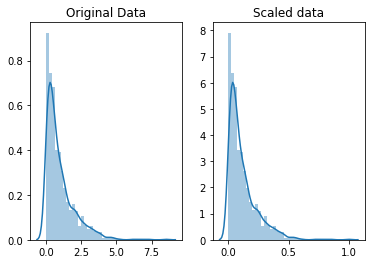

In [3]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

    Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

- #### Normalization
The point of normalization is to change your observations so that they can be described as a normal distribution.

    In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

    Let's try the Box-Cox Transformation method

Text(0.5, 1.0, 'Normalized data')

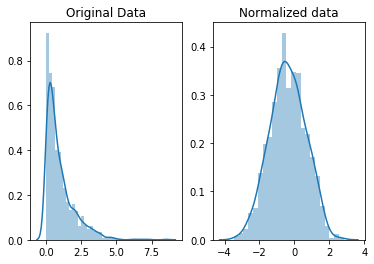

In [4]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Following the tutorial, for the following example, decide whether scaling or normalization makes more sense.

- You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week. You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?
    #### R. Since the distribution is nor normal and given we are thinking to use a regression model, we should normalize our data


- You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?
    #### R. In this case, we can think on sacaling since is a problem of similar parameters, we can't know how many jumps are equivalent to how many push-ups, then scaling is a good approach.

## 2) Practice scaling

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

Text(0.5, 1.0, 'Scaled data')

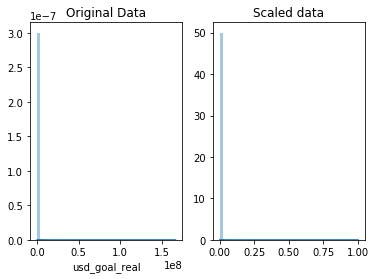

In [5]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

We see that the scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones).

Let's take a look into the goal column.

Text(0.5, 1.0, 'Scaled data')

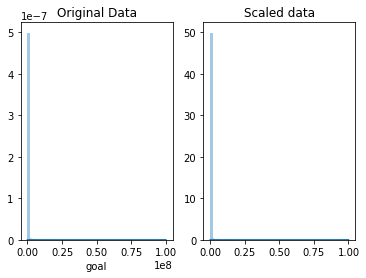

In [6]:
# select the goal_real column
goal = kickstarters_2017.goal

# scale the goals from 0 to 1
scaled_data2 = minmax_scaling(goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data2, ax=ax[1])
ax[1].set_title("Scaled data")

We achieved the scaling of the data. We see similarly than the previous case, that the distribution keep being the same.

## 3) Practice normalization
We're going to normalize the amount of money pledged to each campaign.

Text(0.5, 1.0, 'Normalized data')

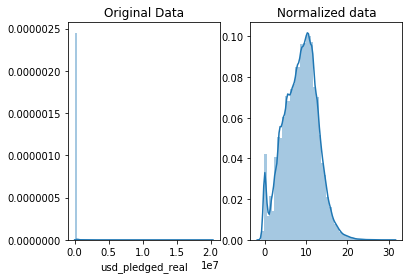

In [7]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

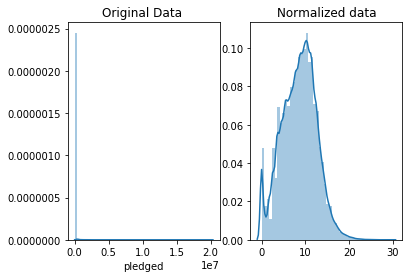

In [9]:
# Our turn! 
# What about the "pledged" column? Does it have the same info?
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data ")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

We obtained a normalized distribution for pledged values.